# <span style="color:red"> Numerical Simulation 11 </span>

## **Exercise 11.1**

In this first exercise we try a linear fit with just one neuron and one layer. Increasing the number of epochs and the number of data points is the key to make this fits works. However having a large number of data is more important than ingreasing epoches. Indeed I've checked that with a larger $N_{\mathrm{train}}$ the fits works well even if I increase $\sigma$.

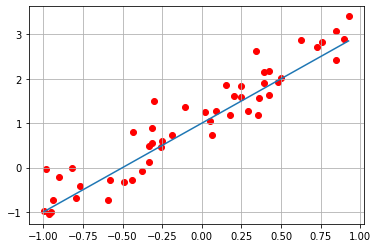

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.4 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
# plot training and target dataset

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [5]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
16/16 [==============================] - 0s 7ms/step - loss: 4.7475 - mse: 4.7475 - val_loss: 3.8689 - val_mse: 3.8689
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 3.6755 - mse: 3.6755 - val_loss: 3.0169 - val_mse: 3.0169
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 2.8861 - mse: 2.8861 - val_loss: 2.3949 - val_mse: 2.3949
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 2.3042 - mse: 2.3042 - val_loss: 1.9203 - val_mse: 1.9203
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 1.8579 - mse: 1.8579 - val_loss: 1.5544 - val_mse: 1.5544
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 1.5111 - mse: 1.5111 - val_loss: 1.2670 - val_mse: 1.2670
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 1.2369 - mse: 1.2369 - val_loss: 1.0446 - val_mse: 1.0446
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 1.0223 - m

In [7]:
# return weights
print()
print("model weights")
model.get_weights()


model weights


[array([[2.0434206]], dtype=float32), array([0.954213], dtype=float32)]

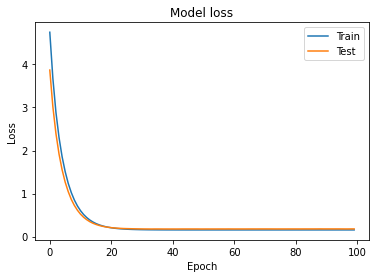

In [8]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

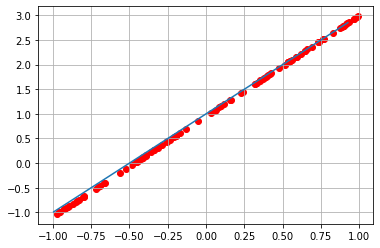

In [9]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

## **Exercise 11.2**

In this exercise we try a more difficult fit, because it's non linear, and that means that even our model will be more complicated. The function is $f(x)=4-3x-2x^2+3x^3$ for $x \in [-1,1]$. 

I've started adiing layers one to one, increasing the number o neurons, but the fit wasn't working. It started fitting better when I've changed the activation lìfunction of some layers, using the "selu". In the chose of the activation funtion I've excluded the functions with plateau, and then I've tried differend combinations of "selu", "elu" and "softplus". In the last plot I show the different prediction of $3$ models: the one with few layers and "relu" activation function, one with different activation funtions and the final one. I've tried changin optimizer and loss, but I've obtained worst results, so at the end I've came back to the ones I was using in the beginning: the "standard gradient descend" as optimizer and the "mean square error" as loss. Abou the metric I haven't found great changes in my model changing it. 

As expected I've checked that incresing the layers and the neurons (so the complexity o fthe model) was increasing the eprecision of my fit. But I've found a problem that even a complex model hasn't fixed: fitting the very end of the function, that has a little growth at the end. Indeed even the final model I've found fitted the end only sometimes (I've found different results rerunning the model). 

The results are shown using $\sigma=0$, but I've tried increasing it and it still works. (I've decided to not show all the results to avoid having a juyter that was unreadable and too long).

As conclusion I want to say that the fit works well in the range $[-1,1]$, but fails when I pass points out fron this range. I've tried plotting some points and, as you can see from the last plot, the prediction of the model is wrong, because the model is not trained outside this range.


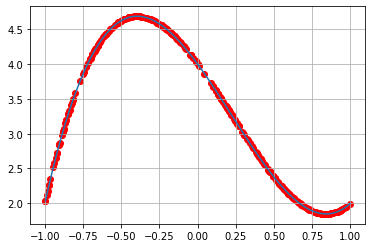

In [58]:
import numpy as np
import matplotlib.pyplot as plt
# target parameters of f(x) = a*x^3+b*x^2+c*x+d
a=3
b=-2
c=-3
d=4

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 3000)
x_valid = np.random.uniform(-1, 1, 300)
x_valid.sort()
y_target = a*pow(x_valid,3)+b*pow(x_valid,2)+c*x_valid+d  # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a*pow(x_train,3)+b*pow(x_train,2)+c*x_train+d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a*pow(x_valid,3)+b*pow(x_valid,2)+c*x_valid+d, sigma)
# plot training and target dataset

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [65]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras import optimizers, losses, metrics

model = tf.keras.Sequential()
model.add(Dense(30, input_shape=(1,), activation="selu"))
model.add(Dense(30, activation="softplus"))
model.add(Dense(20, activation="selu"))
model.add(Dense(20, activation="elu"))
model.add(Dense(1, activation="elu"))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=["mae"])

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 30)                60        
_________________________________________________________________
dense_92 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_93 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_94 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 21        
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
_________________________________________________________________


In [0]:
#fit the model using training dataset
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=150,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

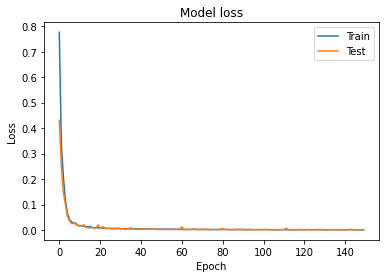

In [67]:
# look into training history
# Plot training & validation loss values

model.get_weights()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

old models used just for the comparison graph

In [0]:
model1 = tf.keras.Sequential()
model1.add(Dense(30, input_shape=(1,)))
model1.add(Dense(30))
model1.add(Dense(20))
model1.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='sgd', loss='mse', metrics=["mae"])
#fit the model using training dataset
history = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=150,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# evaluate model
score = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])



In [0]:
model2 = tf.keras.Sequential()
model2.add(Dense(30, input_shape=(1,), activation="selu"))
model2.add(Dense(30, activation="softplus"))
model2.add(Dense(20, activation="selu"))
model2.add(Dense(20, activation="elu"))
model2.add(Dense(1, activation="elu"))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='Adagrad', loss='mse', metrics=["mae"])
#fit the model using training dataset
history = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=150,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# evaluate model
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

- compariosn between differend NNs

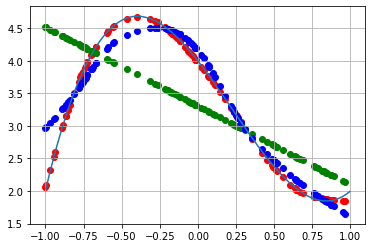

In [68]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
y1_predicted=model1.predict(x_predicted)
y2_predicted=model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r')
plt.scatter(x_predicted, y1_predicted, color='g')
plt.scatter(x_predicted, y2_predicted, color='b')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

- plot outside the trained region

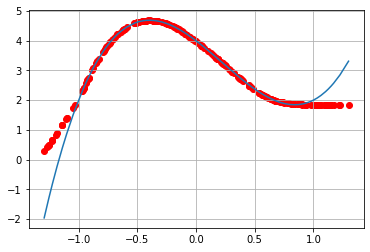

In [71]:
x_predicted = np.random.uniform(-1.3, 1.3, 200)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r')
x_predicted.sort()
y_target = a*pow(x_predicted,3)+b*pow(x_predicted,2)+c*x_predicted+d
plt.plot(x_predicted, y_target)
plt.grid(True)
plt.show()

## **Exercise 11.3**

For this exercise the work was incredibly easy, because I've tried using the same model that I've built for the prevois exercise and it worked perfectly. Now the function to fit is the 2D function $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$. 
Because of the increased complexity I've used a larger $N_{\mathrm{train}}$, but i's teh only thing I needed to change to make it work.

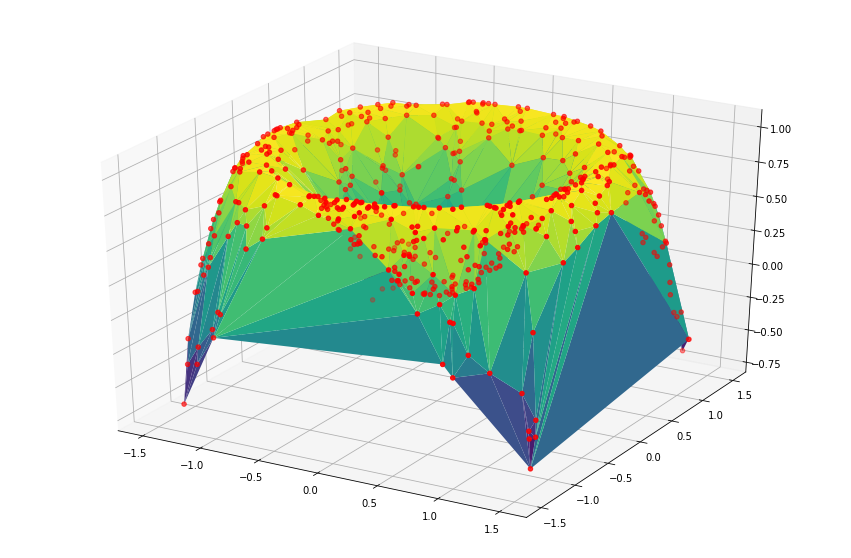

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
%matplotlib inline
#f(x,y) = sin(x^2+y^2)
def f(x, y):
    return np.sin(x ** 2 + y ** 2)

# generate training inputs
np.random.seed(0)
n_tr = 5000
n_val = 500
x_tr = np.zeros((n_tr, 2))
y_tr = np.zeros(n_tr)
x_val = np.zeros((n_val, 2))
y_val = np.zeros(n_val)
x=np.zeros(n_val)
y=np.zeros(n_val)
#y_target=np.zeros(n_val)
sigma = 0.0 # noise standard deviation

for i in range(n_tr):
  x_tr[i,0]=np.random.uniform(-1.5, 1.5)
  x_tr[i,1]=np.random.uniform(-1.5, 1.5)
  y_tr[i]=np.random.normal(np.sin(pow(x_tr[i,0],2)+pow(x_tr[i,1],2)), sigma)

for i in range(n_val):
  x_val[i,0]=np.random.uniform(-1.5, 1.5)
  x_val[i,1]=np.random.uniform(-1.5, 1.5)
  x[i]=x_val[i,0]
  y[i]=x_val[i,1]
  y_val[i]=np.random.normal(np.sin(pow(x[i],2)+pow(y[i],2)), sigma)
 # y_target[i]=np.sin(pow(x_tr[i,0],2)+pow(x_tr[i,1],2))
y_target=f(x,y)
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")  

ax.plot_trisurf(x, y, y_target,cmap="viridis",edgecolor="none")
ax.scatter3D(x,y, y_val, color='r')
plt.grid(True); plt.show()

In [30]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras import optimizers, losses, metrics

model = tf.keras.Sequential()
model.add(Dense(30, input_shape=(2,), activation="selu"))
model.add(Dense(30, activation="softplus"))
model.add(Dense(20, activation="selu"))
model.add(Dense(20, activation="selu"))
model.add(Dense(20, activation="elu"))
model.add(Dense(1, activation="elu"))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=["mae"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 30)                90        
_________________________________________________________________
dense_21 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_22 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_23 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_24 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 21        
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
____________________________________________________

In [31]:
#fit the model using training dataset
history = model.fit(x=x_tr, y=y_tr, 
          batch_size=32, epochs=200,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_val, y_val))

Epoch 1/200
157/157 [==============================] - 0s 2ms/step - loss: 0.1632 - mae: 0.3206 - val_loss: 0.1472 - val_mae: 0.3176
Epoch 2/200
157/157 [==============================] - 0s 2ms/step - loss: 0.1506 - mae: 0.3102 - val_loss: 0.1559 - val_mae: 0.3423
Epoch 3/200
157/157 [==============================] - 0s 2ms/step - loss: 0.1499 - mae: 0.3090 - val_loss: 0.1445 - val_mae: 0.3206
Epoch 4/200
157/157 [==============================] - 0s 2ms/step - loss: 0.1478 - mae: 0.3067 - val_loss: 0.1435 - val_mae: 0.3077
Epoch 5/200
157/157 [==============================] - 0s 2ms/step - loss: 0.1482 - mae: 0.3086 - val_loss: 0.1848 - val_mae: 0.3086
Epoch 6/200
157/157 [==============================] - 0s 2ms/step - loss: 0.1472 - mae: 0.3076 - val_loss: 0.1436 - val_mae: 0.3022
Epoch 7/200
157/157 [==============================] - 0s 2ms/step - loss: 0.1422 - mae: 0.3025 - val_loss: 0.1433 - val_mae: 0.3251
Epoch 8/200
157/157 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 1ms/step - loss: 9.2464e-04 - mae: 0.0230

Test loss: 0.0009246393456123769
Test accuracy: 0.023012354969978333


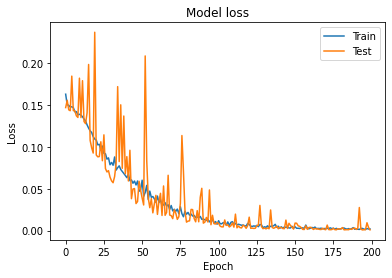

In [32]:
# evaluate model
score = model.evaluate(x_val, y_val, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation loss values
model.get_weights()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


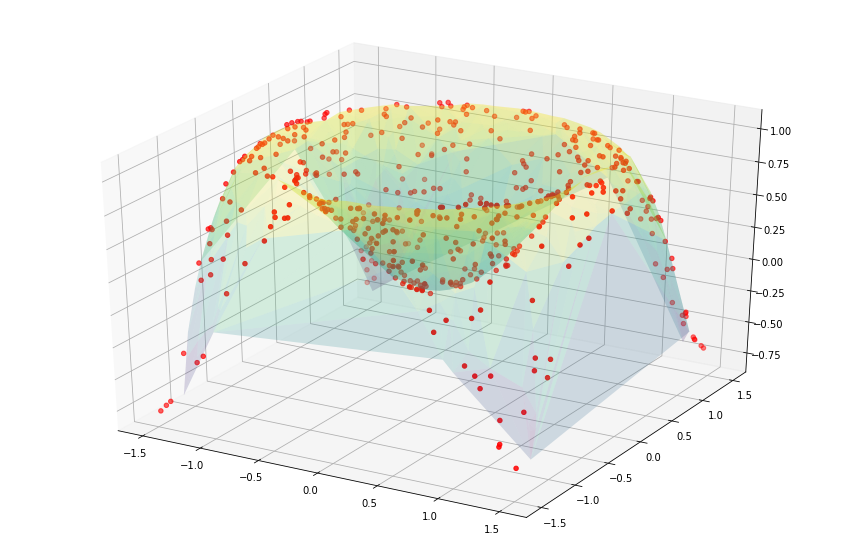

In [33]:
n=500
x0=np.zeros(n)
y0=np.zeros(n)
x_predicted = np.zeros((n, 2))
for i in range(n):
  x_predicted[i,0]=np.random.uniform(-1.5, 1.5)
  x_predicted[i,1]=np.random.uniform(-1.5, 1.5)
  x0[i]=x_predicted[i,0]
  y0[i]=x_predicted[i,1]
y_predicted = model.predict(x_predicted) 

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d") 
ax.plot_trisurf(x, y, y_target,cmap="viridis",edgecolor="none", alpha=0.2)
#ax.plot_trisurf(x0, y0, y_predicted, cmap="viridis",edgecolor="none")
ax.scatter3D(x0,y0, y_predicted, color='r')
plt.grid(True)
plt.show()